In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
df = pd.read_csv("long_run_varying_flows_labelled.csv")
print(df.shape)
drop_cols = ["Timestamp_IST", "State"]
df = df.drop(columns=drop_cols)


(86400, 50)


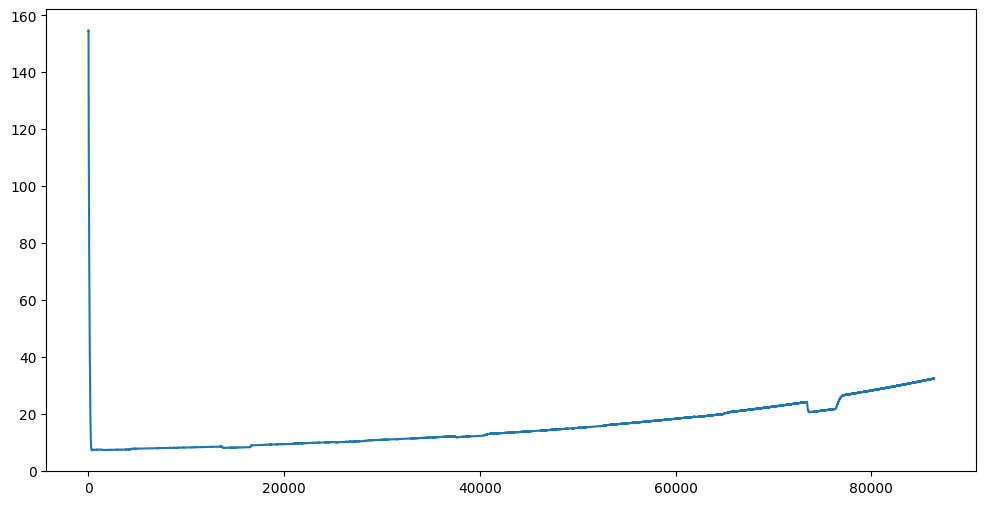

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['S1-PT-1001A'], label='S1-PT-1001A')

In [19]:
csv_1 = pd.read_csv(r"C:\Users\adith\AppData\Local\Temp\5c4a1605-e71e-4f33-8c31-d281f3c4bdb0_Emerson_app.zip.db0\GlitchDetect\PCA\varying_flows.csv")

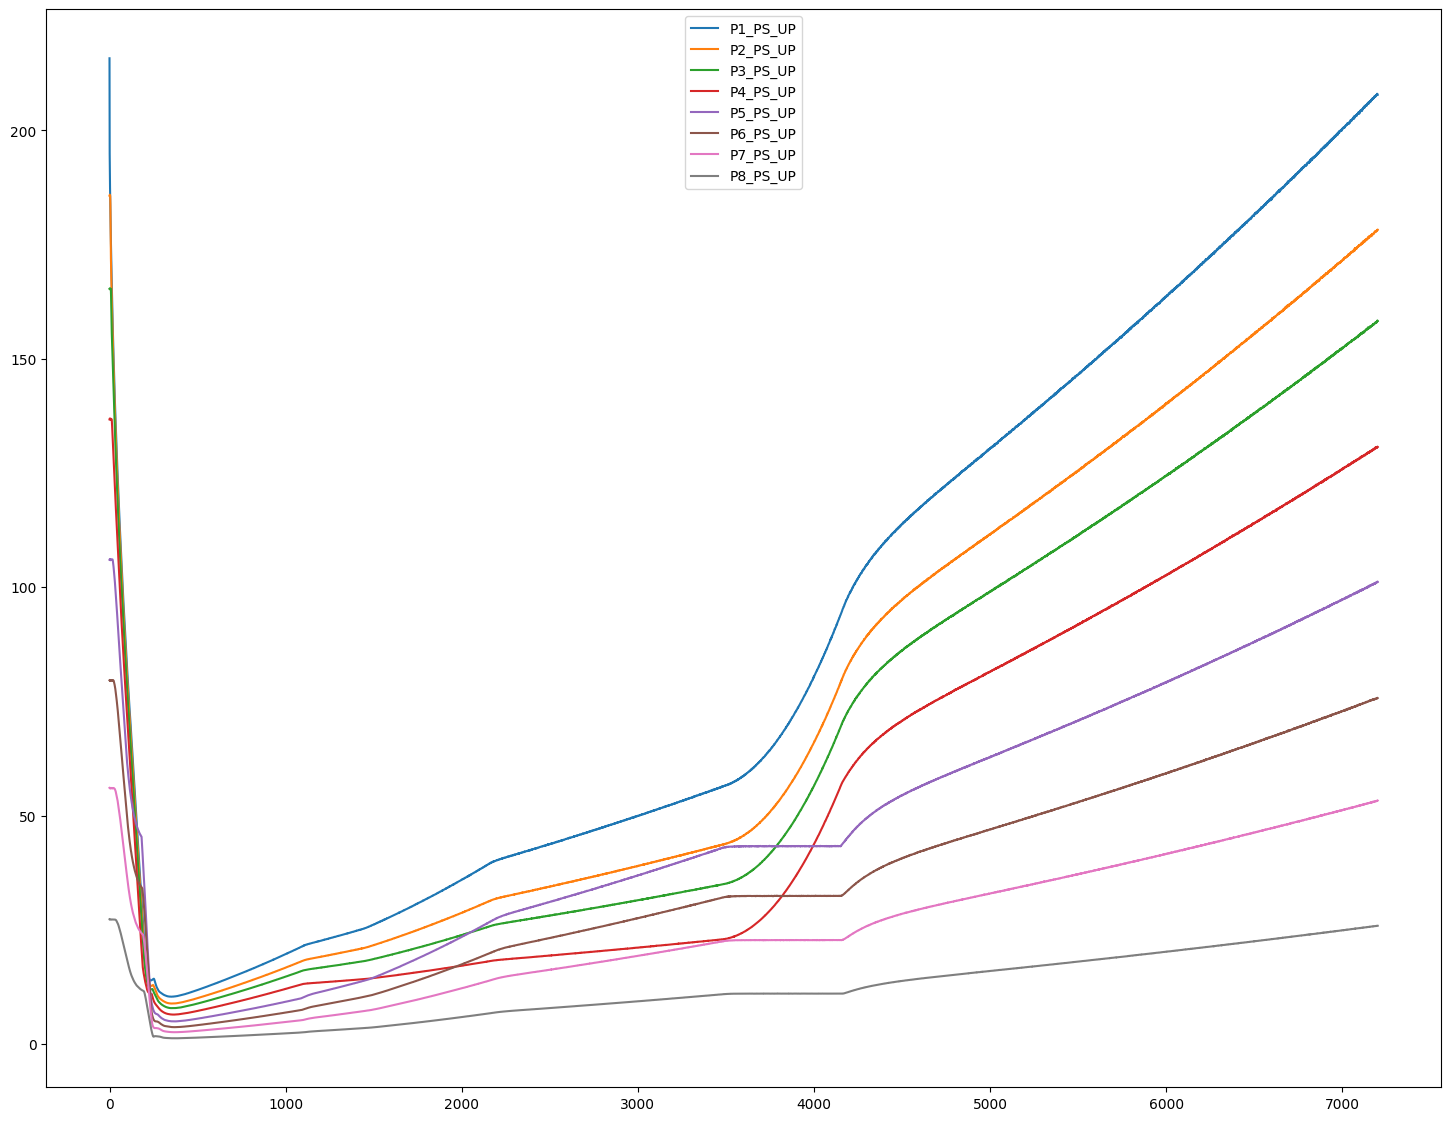

In [31]:
plt.figure(figsize=(18, 14))
for i in range(1, 9):
    plt.plot(csv_1[f'P{i}_PS_UP'], label=f'P{i}_PS_UP')

plt.legend()
plt.show()

In [46]:
lr = pd.read_csv('F:\MultiDimensionalAD\data\long_run_labelled.csv')


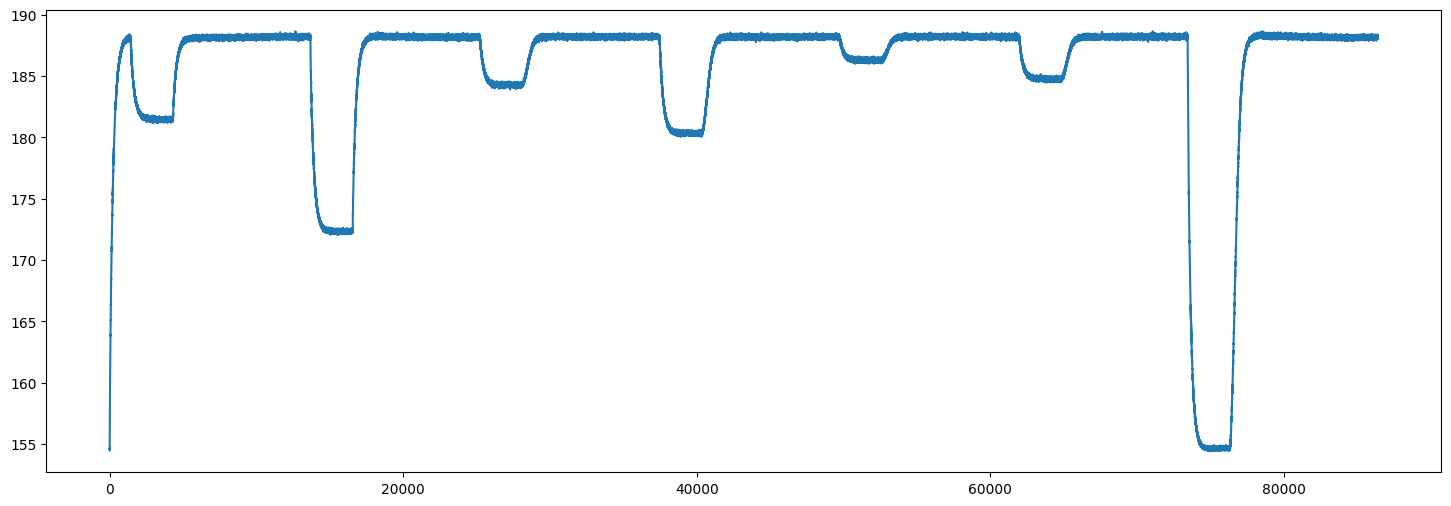

In [47]:
plt.figure(figsize=(18, 6))
plt.plot(lr['S1-PT-1001A'])

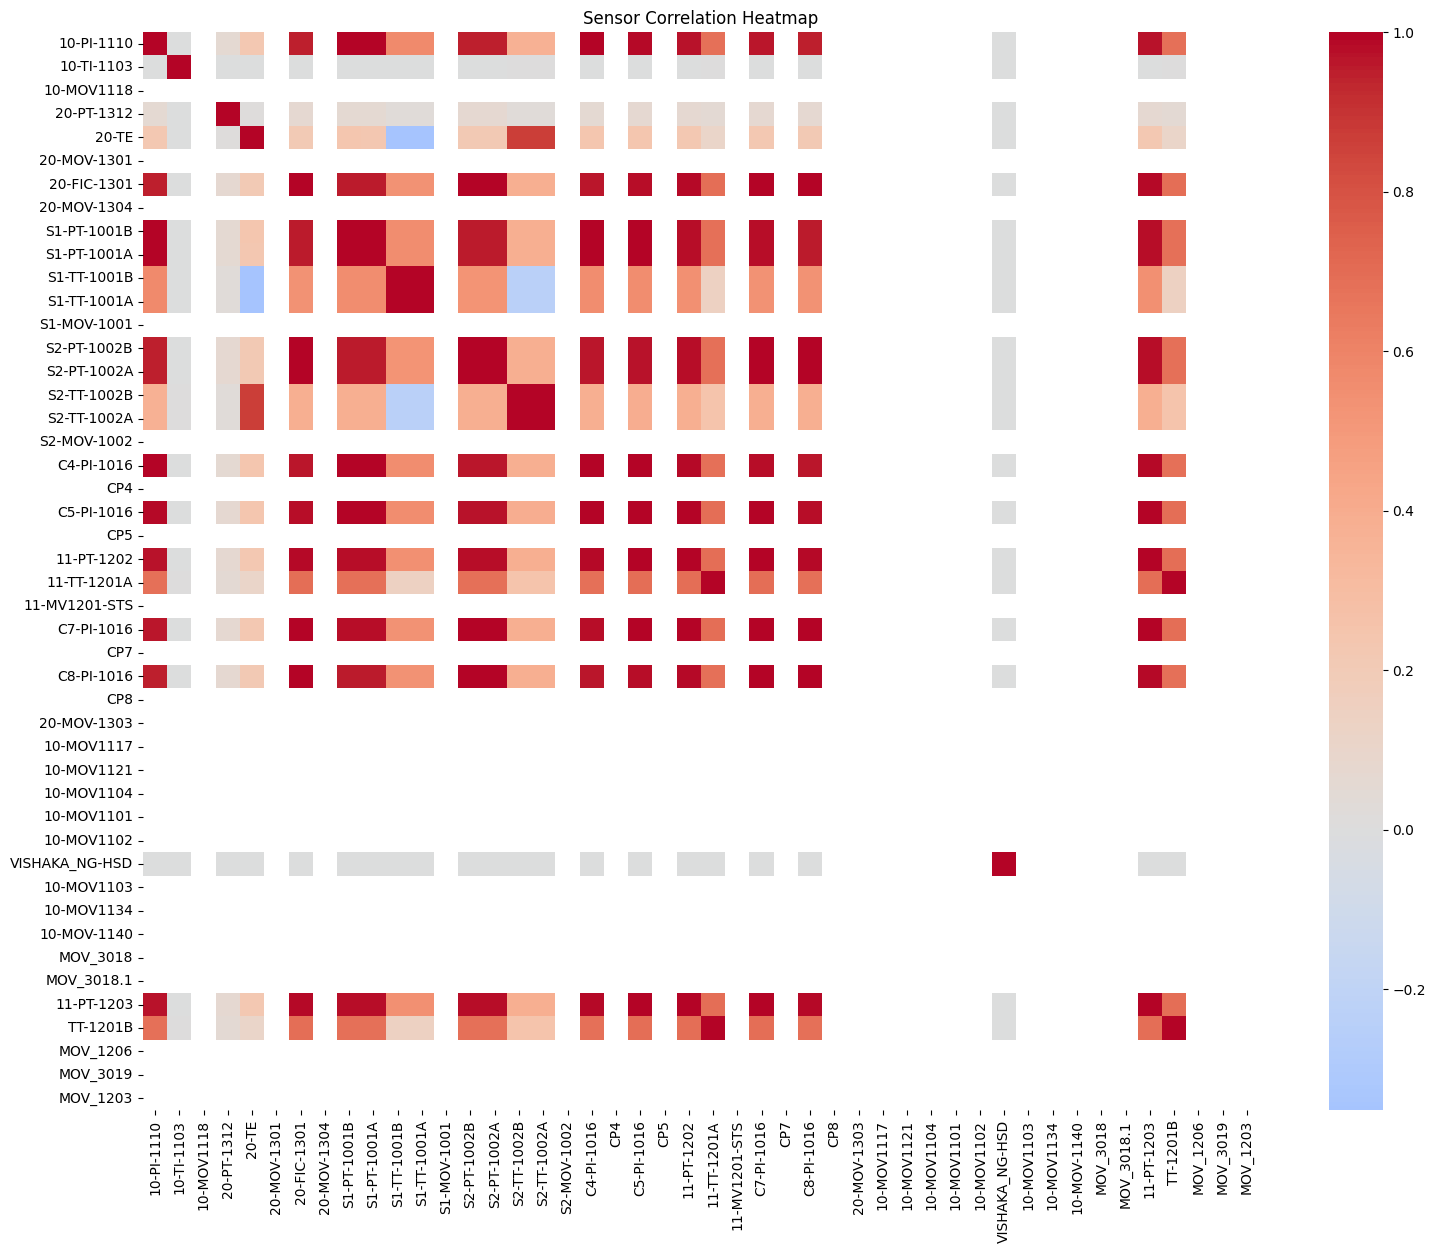

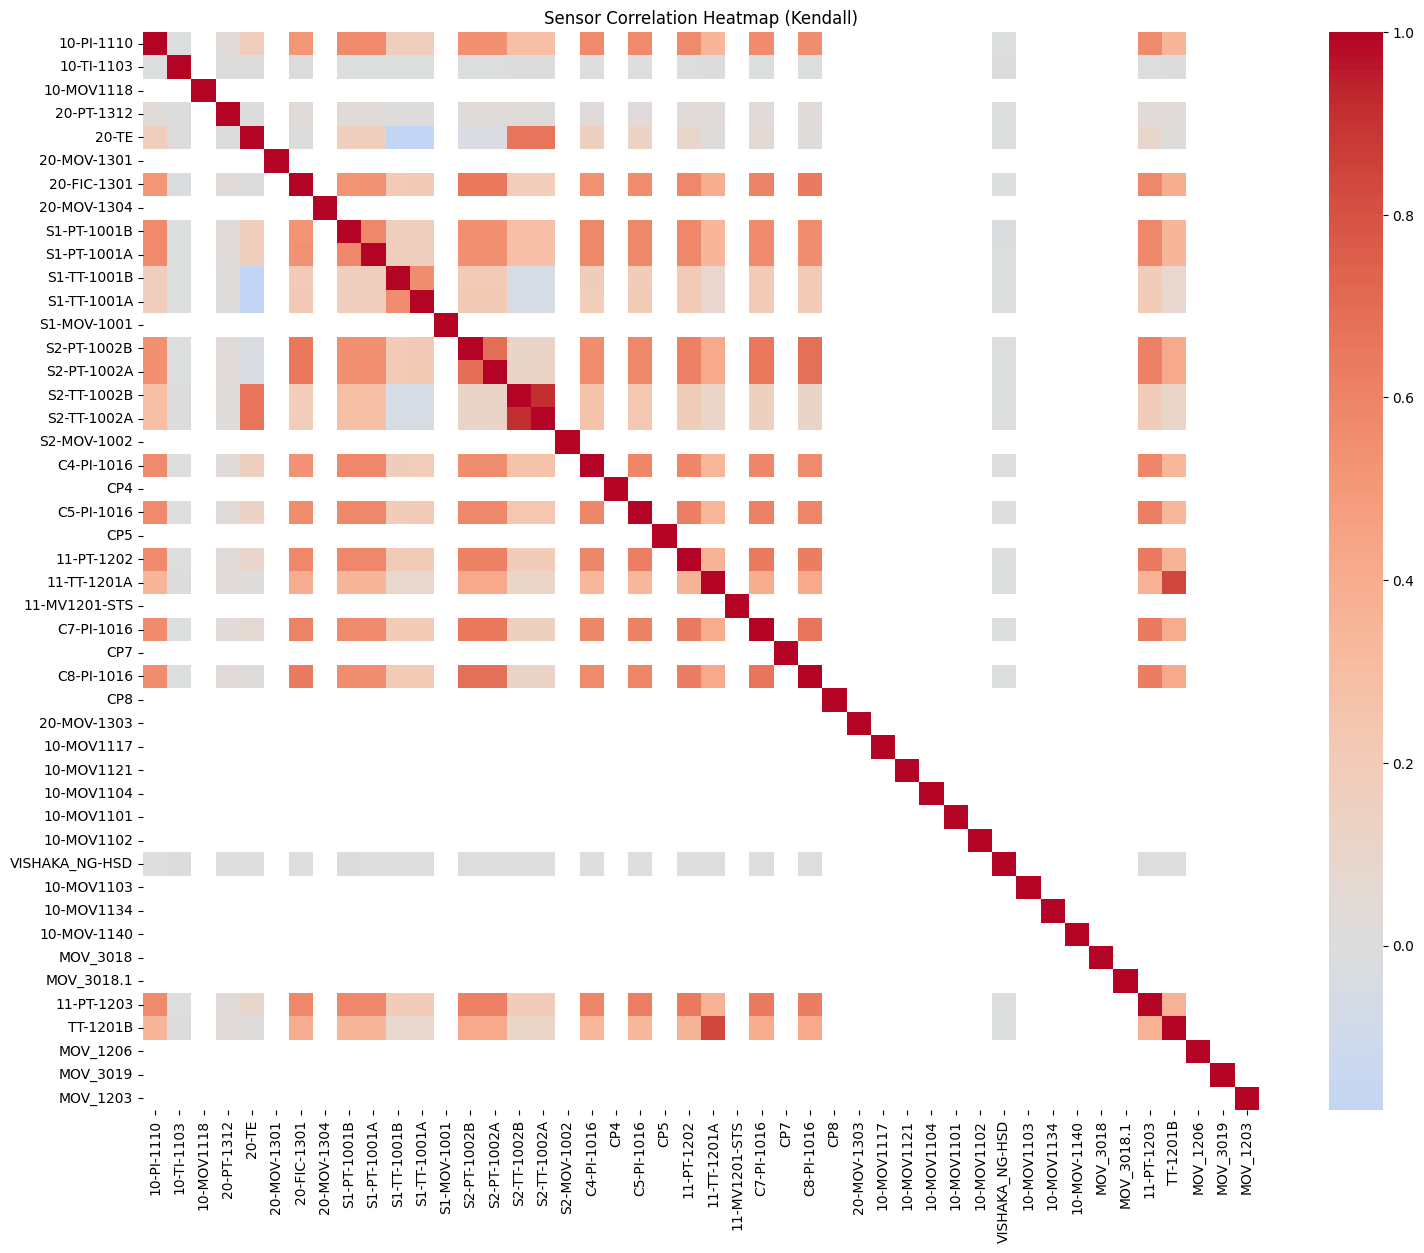

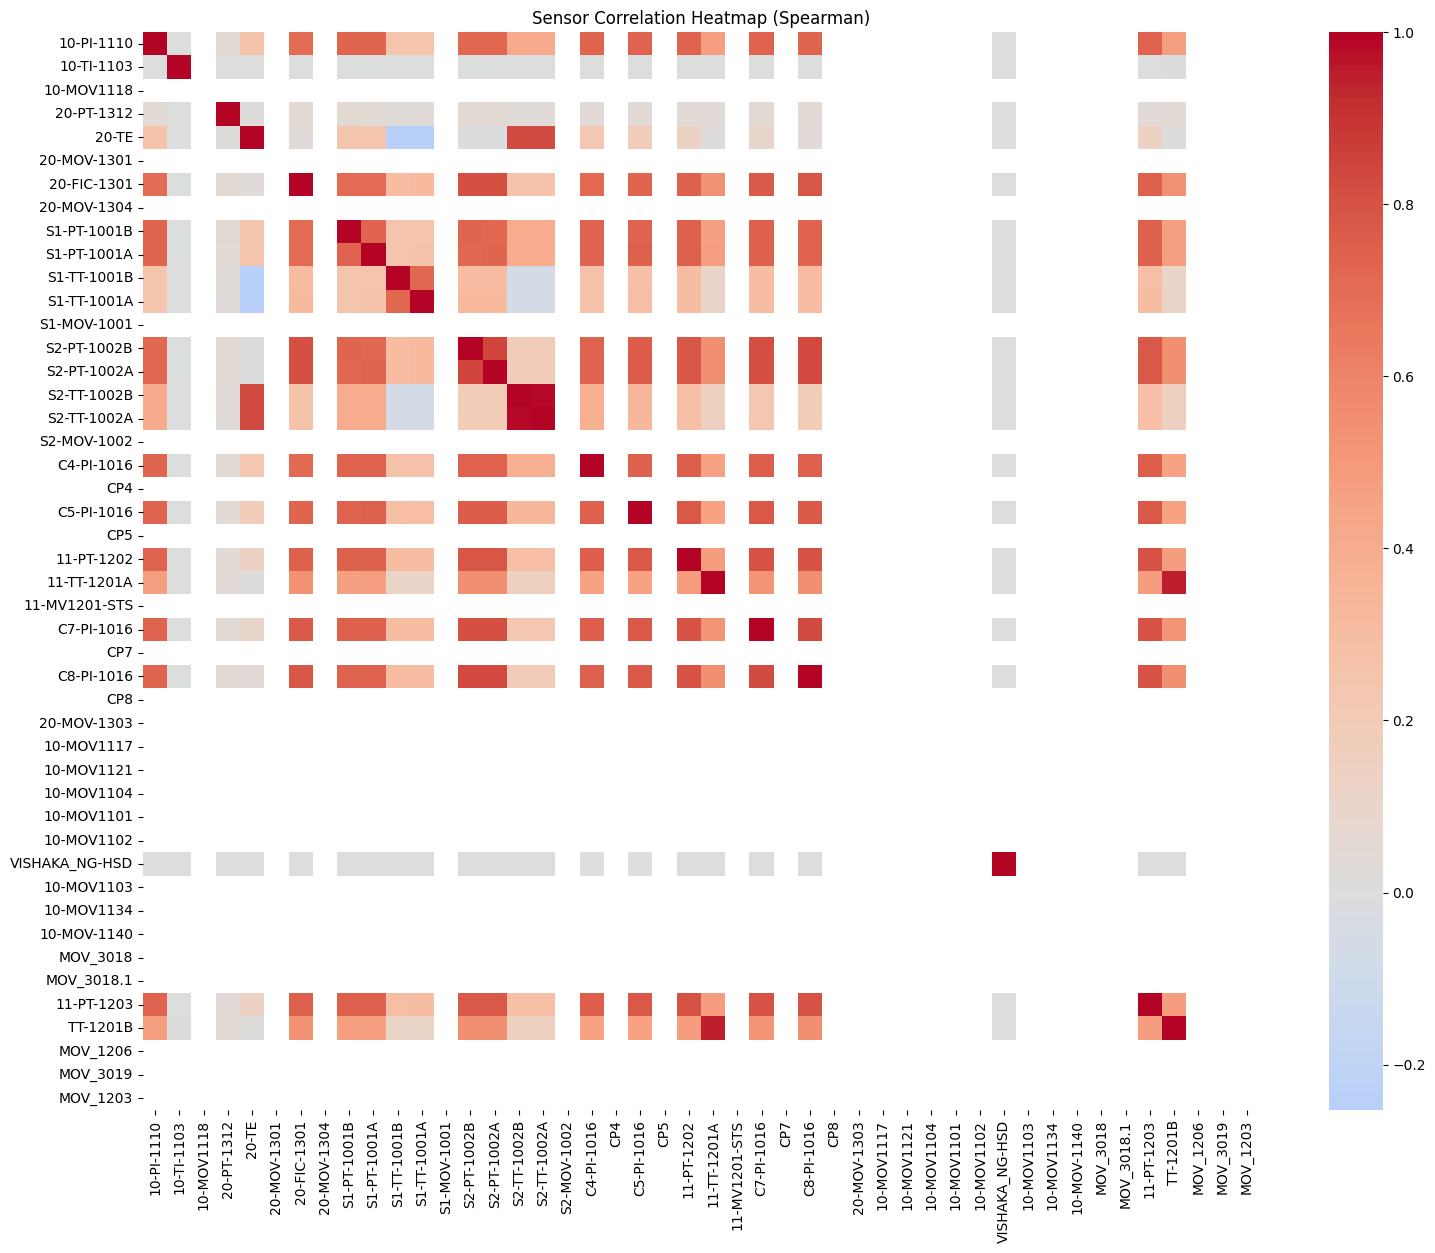

                10-PI-1110  10-TI-1103  10-MOV1118  20-PT-1312     20-TE  \
10-PI-1110        1.000000   -0.002134         NaN    0.029094  0.173009   
10-TI-1103       -0.002134    1.000000         NaN    0.000398  0.000729   
10-MOV1118             NaN         NaN         1.0         NaN       NaN   
20-PT-1312        0.029094    0.000398         NaN    1.000000  0.008596   
20-TE             0.173009    0.000729         NaN    0.008596  1.000000   
20-MOV-1301            NaN         NaN         NaN         NaN       NaN   
20-FIC-1301       0.523237   -0.005165         NaN    0.031189  0.008096   
20-MOV-1304            NaN         NaN         NaN         NaN       NaN   
S1-PT-1001B       0.573925   -0.003025         NaN    0.030676  0.167355   
S1-PT-1001A       0.574625   -0.001052         NaN    0.028977  0.167567   
S1-TT-1001B       0.167754   -0.001622         NaN    0.015463 -0.179922   
S1-TT-1001A       0.169415   -0.001459         NaN    0.017721 -0.179699   
S1-MOV-1001 

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

X = lr.drop(columns=["Timestamp_IST", "State", "label", 'Seconds'])

corr = X.corr(method="pearson")
corr_ken = X.corr(method="kendall")
corr_spearman = X.corr(method="spearman")

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_ken, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Kendall)")
plt.show()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_spearman, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Spearman)")
plt.show()

print(corr_ken)


In [52]:
le = LabelEncoder()
lr["label_encoded"] = le.fit_transform(lr["label"])

X = lr.drop(columns=["label", "label_encoded", "Timestamp_IST", "State", 'Seconds'])
y = lr["label_encoded"]

print("All classes:", le.classes_)
from sklearn.model_selection import train_test_split

All classes: ['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']


In [53]:
# apply PCA on all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)


In [50]:
print("Train classes:", le.inverse_transform(np.unique(y_train)))
print("Test classes :", le.inverse_transform(np.unique(y_test)))


Train classes: ['2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250' 'no_fault']
Test classes : ['10pct0' 'no_fault']


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [42]:
pca = PCA(n_components=3, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


In [43]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.62594804 0.19965307 0.06570283]
Cumulative variance: [0.62594804 0.82560112 0.89130395]


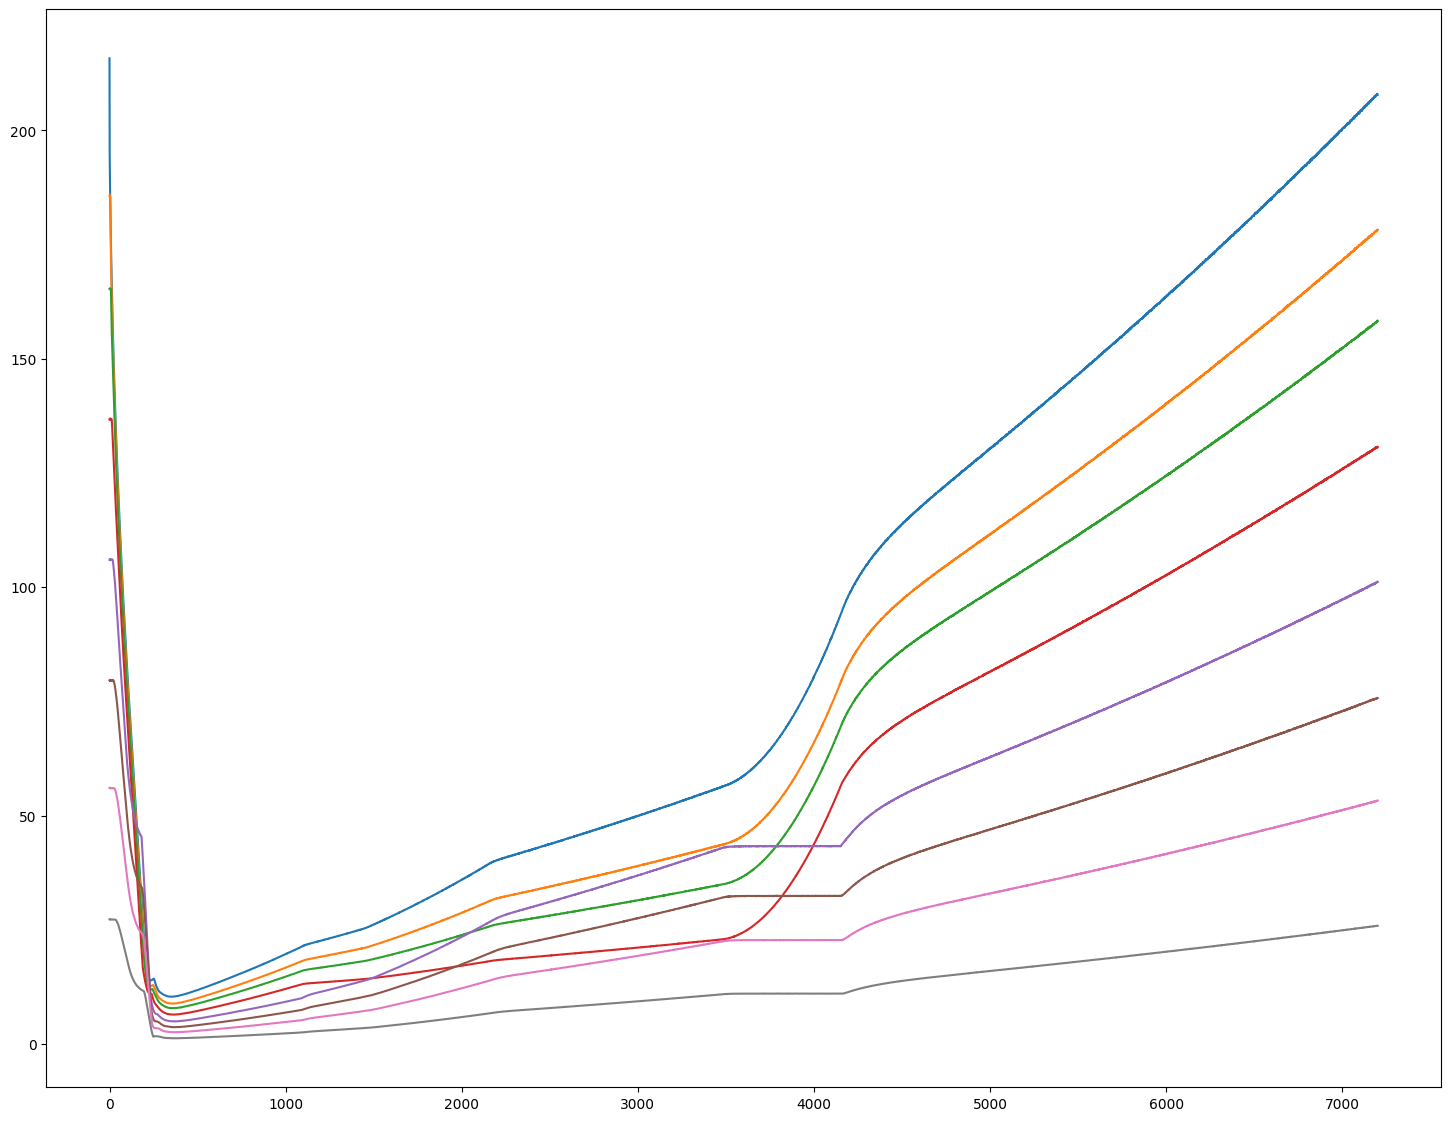

In [57]:
plt.figure(figsize=(18, 14))

for i in range(1, 9):
    plt.plot(csv_1[f'P{i}_PS_UP'], label=f'P{i}_PS_UP')
    